# Simulation of Physical Systems Tutorial - Assignment 1

In [10]:
import scipy
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import clear_output
#For displaying animations inside the jupyter notebook
%matplotlib notebook 

## Task 1: N-Body Simulation

## System Class

In [11]:
AU = 1.49e11 #Astronomical units
G=6.67e-11 #Gravitational constant

class System:
    
    def __init__(self, bodies, time_step):
        # Initialises with given quantities
        
        self.bodies = bodies
        self.time_step = time_step
        
    def update(self):
        velocities = []
        positions = []
        directions = []
        
        for i in range(len(self.bodies)):
            
            #List of every other body to consider
            temp_bodies = self.bodies.copy()
            temp_bodies.remove(self.bodies[i])
            
            #Calculate update
            velocity, position, direction = self.bodies[i].update(self.time_step, temp_bodies)
            
            
            velocities.append(velocity)
            positions.append(position)
            directions.append(direction)
            
        for i in range(len(self.bodies)):
            self.bodies[i].velocity = velocities[i]
            self.bodies[i].position = positions[i]
            self.bodies[i].vel_direction = directions[i]

## Body Class

In [12]:
class Body:
    
    def __init__(self, position, vel, vel_direction, mass=0, color="r", size=3):
        # Initialises with given quantities
        
        #Should be a tuple with x and y position
        self.position = position
        
        self.velocity = vel
        
        self.vel_direction = vel_direction
        
        self.mass = mass
        
        self.color = color
        
        self.size = size
    
    def force_by_body(self, body):
        # Returns the force acting on this body by another, given body
        # Returns as a tuple of force in the x and y direction
        
        #Define quantities from self and body
        m1, m2 = self.mass, body.mass
        x1, y1 = self.position[0], self.position[1]
        x2, y2 = body.position[0], body.position[1]
        
        #Find distance between the bodies
        r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        
        #If the radius is 0, the force is also 0
        if r == 0:
            return 0, 0
            
        #Calculate the force with the law of gravitation
        force = (m1*m2*G) / r**2
        
        #Find differences in distance
        dist_x = x2 - x1
        dist_y = y2 - y1
        
        #Determine direction (radians)
        direction = np.arctan2(dist_y, dist_x)
        
        #Find component forces
        force_x = force * np.cos(direction)
        force_y = force * np.sin(direction)
        
        return force_x, force_y
    
    def acceleration(self, bodies):
        
        total_force_x = 0
        total_force_y = 0
        
        for body in bodies:
            force = self.force_by_body(body)
            
            total_force_x += force[0]
            total_force_y += force[1]
        
        return (total_force_x / self.mass, total_force_y / self.mass)
    
    def update(self, time_step, bodies):        
        #Changes velocity into Cartesian coordinates
        # We don't like polar coordinates in this household unfortunately
        vel_x = self.velocity * np.cos(np.deg2rad(self.vel_direction))
        vel_y = self.velocity * np.sin(np.deg2rad(self.vel_direction))
        
        
        #Calculate current acceleration
        a = self.acceleration(bodies)
        
        new_vel_x = vel_x + a[0]*time_step
        new_vel_y = vel_y + a[1]*time_step
        
        new_vel = np.sqrt(new_vel_x**2 + new_vel_y**2)
        new_direction = np.rad2deg(np.arctan2(new_vel_y, new_vel_x))
        
        #Calculate new position
        new_pos_x = self.position[0] + vel_x*time_step + 0.5*a[0]*time_step*time_step
        new_pos_y = self.position[1] + vel_y*time_step + 0.5*a[1]*time_step*time_step
        
        new_pos = (new_pos_x, new_pos_y)
        
        #print(self.velocity, new_vel)
        #print(self.position, new_pos)
        #print(self.vel_direction, new_direction)
        
        return new_vel, new_pos, new_direction

## Test Cases and Animation

In [13]:
#Test case 1

scale = 3e9
G = 6.67e-11 
m1 =  5.9742*10**24
m2 =  5.9742*10**25
v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

b1 = Body(position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size = 15)
b2 = Body(position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size = 15)

bodies = [b1, b2]

In [17]:
#Test case 2

scale = 1.79e9
pos = np.asarray((-0.97000436*scale, 0.24308753*scale))
m1 =  5.9742*10**24
v = 297.83
v_d = 42.843398292913164

b1 = Body(position = pos, mass = m1, vel = v, vel_direction = v_d, color = 'r', size = 15)
b2 = Body(position = -pos, mass = m1, vel = v, vel_direction = v_d, color = 'g', size = 15)
b3 = Body(position = (0,0), mass = m1, vel = 2*v, vel_direction = v_d-180, color = 'b', size = 15)

bodies = [b1, b2, b3]

In [15]:
# Test case 3

scale = 1.49e11

Sun     = Body(position = (0,0), 
               vel = 0, 
               vel_direction = 0)

Earth   = Body(position = (-1*scale,0),
                vel = 29.783*1000,
                vel_direction = 90)

Venus   = Body(position = (0.723*scale, 0),
                vel = 35.02*1000,
                vel_direction = 270)

Mars    = Body(position = (-1.52*scale, 0),
                vel = 24*1000,
                vel_direction = 90)


Sun.mass    = 1.98892e30
Sun.color   = 'orange'
Sun.size    = 30
    
Earth.mass  = 5.9742 * 10 ** 24
Earth.color = 'b'
Earth.size  = 8
    
Venus.mass  = 4.8685 * 10 ** 24
Venus.color = 'y'
Venus.size  = 9
   
Mars.mass   = 6.39 * 10 ** 23
Mars.color  = 'r'
Mars.size   = 6


bodies = [Sun, Earth, Venus, Mars]

<IPython.core.display.Javascript object>


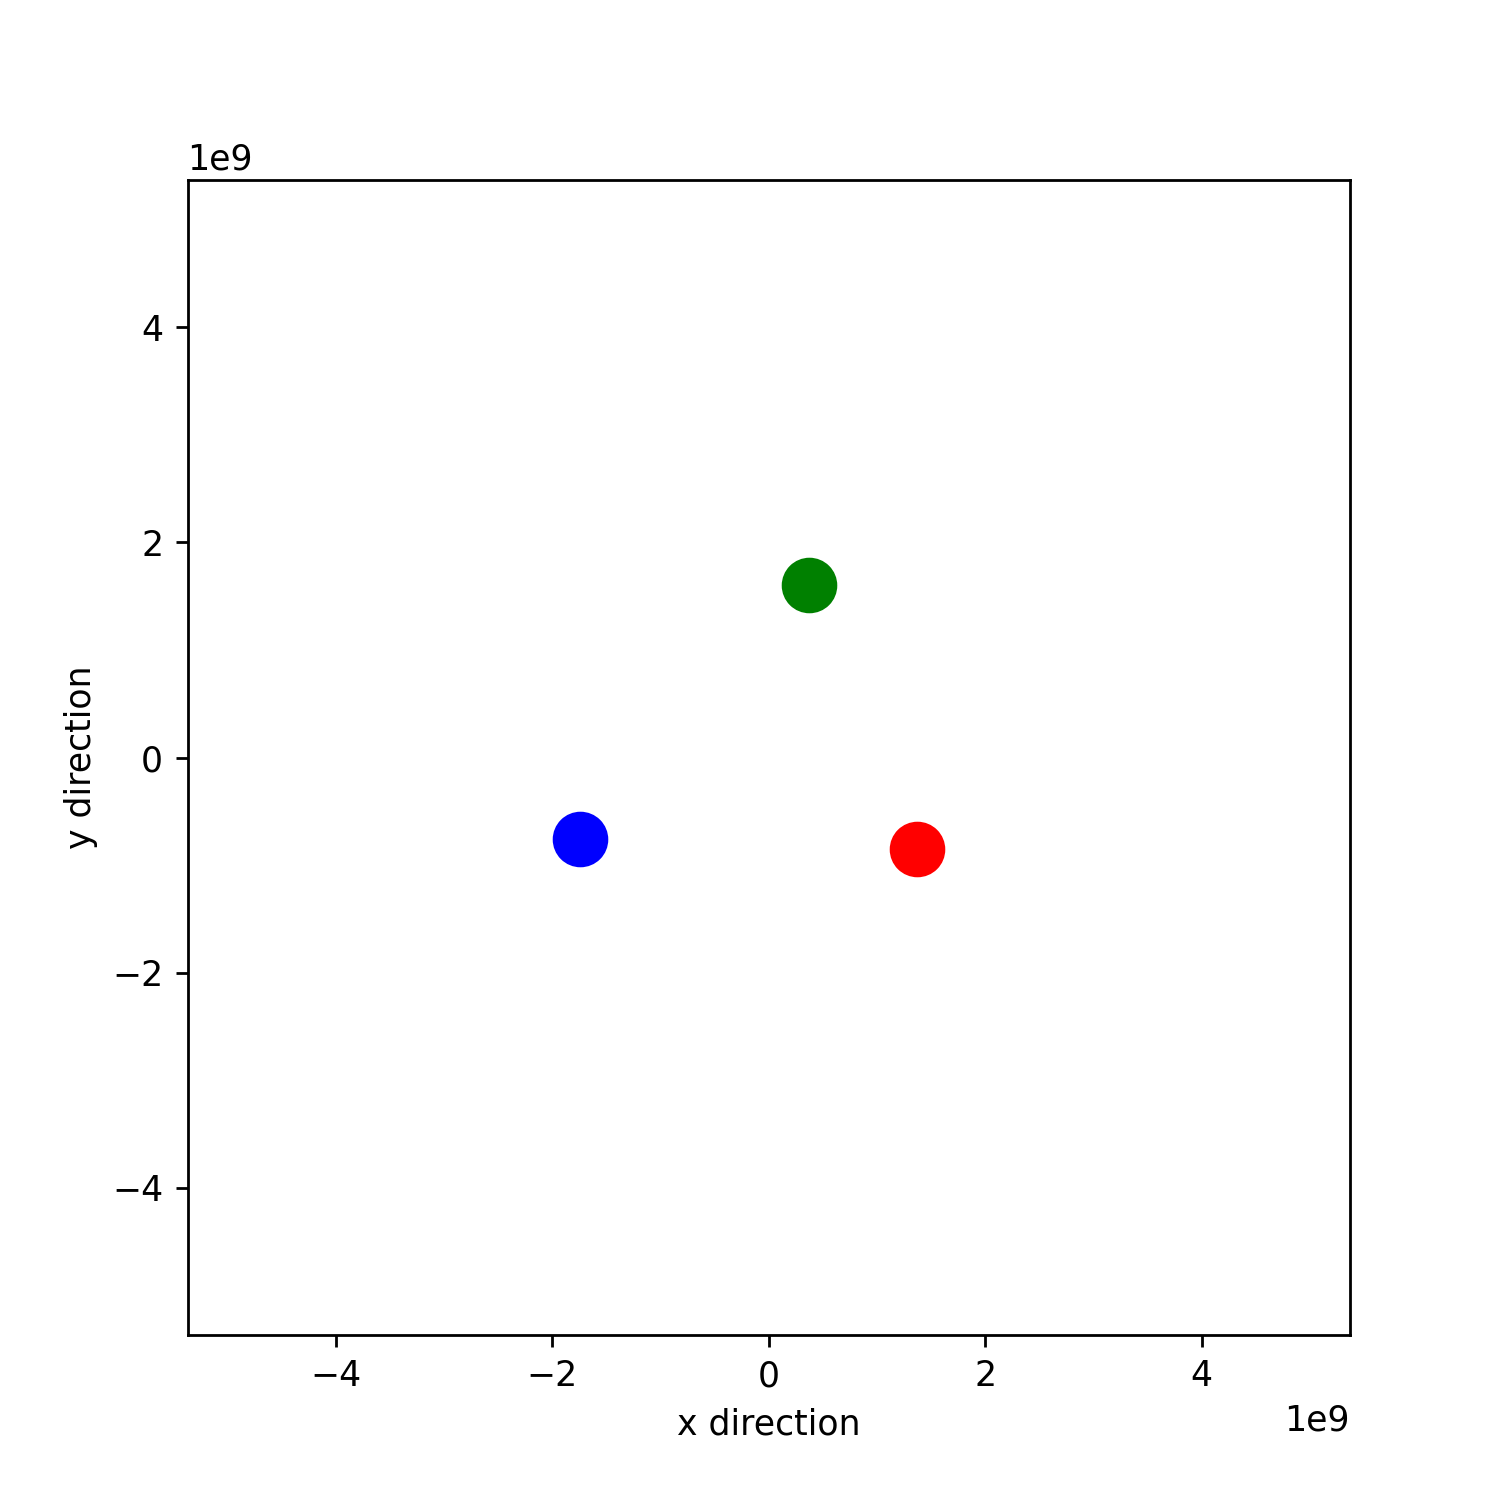

In [18]:
def animate(i, system, lines):
    #Run 200 update steps between each frame.
    #Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 1000/30, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
#print("Writing to file")
#ani.save("OrbitSimulation.gif")
#print("Done")

plt.show()

In [8]:
raise NotImplementedError

NotImplementedError: 

NotImplementedError: 

## Task 2 - Ising Model

### Original Ising Model

In [ ]:
class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300, h=0):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
              
            h (float) The external field applied to the grid
        '''
        self.size = size
        self.temperature = temperature
        self.h = h
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        
        self.temperature = float(temp)
        
    def set_h(self, temp):
        '''
        Set the external magnetic field acting on the model
        '''
        
        self.h = temp

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        
        return ((-self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1) +
            scipy.roll(self.state, -1, axis=0) +
            scipy.roll(self.state, -1, axis=1))).sum()) - 
               self.h * self.state.sum())

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        delta_E = ((2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size]))
                   + 2 * self.h * self.state[i,j])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        
        #Determines if the state should be flipped
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))


In [ ]:
size = 64
sim = IsingSimulation(size, temperature=10)
steps = []
mags = []

for _ in range(10000000):
    sim.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim.average_magnetism())
sim.display()
plt.figure

print(sim.average_magnetism())

In [ ]:
plt.plot(steps, mags)
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")

### 3D Ising Model (Optional)

This model uses the layer visualisation technique, where we can see an individual layer and its evolution. A more complete picture can be told with the overall magnetisation m, as this gives us a metric of magnetisation across the entire cellular automata.

In [ ]:
class IsingSimulation3D:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300, h=0):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
              
            h (float) The external field applied to the grid
        '''
        self.size = size
        self.temperature = temperature
        self.h = h
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        
        self.temperature = float(temp)
        
    def set_h(self, temp):
        '''
        Set the external magnetic field acting on the model
        '''
        
        self.h = temp

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        
        return ((-self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1) +
            scipy.roll(self.state, -1, axis=0) +
            scipy.roll(self.state, -1, axis=1) + 
            scipy.roll(self.state, 1, axis=2) +
            scipy.roll(self.state, -1, axis=2))).sum()) - 
               self.h * self.state.sum())

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j, k = scipy.random.randint(self.size, size=3)

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        delta_E = ((2 * self.J * self.state[i,j,k] * (
            self.state[(i + 1) % self.size, j, k] +
            self.state[(i - 1) % self.size, j, k] +
            self.state[i, (j + 1) % self.size, k] +
            self.state[i, (j - 1) % self.size, k] + 
            self.state[i, j, (k + 1) % self.size] +
            self.state[i, j, (k - 1) % self.size]))
                   + 2 * self.h * self.state[i,j,k])    
        
        
        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        
        #Determines if the state should be flipped
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j,k] = -self.state[i,j,k]

        self.step += 1

    def display(self, layer=0):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state[:, :, layer], vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))


In [ ]:
size = 16
t = 900
h = 0.5    

sim = IsingSimulation3D(size, temperature=t, h = h)
layer = size//2
steps = []
mags = []

for _ in range(100000):
    sim.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim.average_magnetism())
        
        if _ % 100000 == 0:
            sim.display(layer)
            plt.figure
sim.display(layer)
plt.figure

print(sim.average_magnetism())

### Example Scenarios

In [ ]:
# Estimating the critical temperature

#Defined quantities
size = 32
h = 0

#Storage variables
steps = []
mags = []

#Temperature to be changed
temp = [10, 100, 500, 1000, 1500]

for i in range(5):
    sim = IsingSimulation(size, temperature=temp[i])
    steps.append([])
    mags.append([])

    for _ in range(1000000):
        sim.update()
        if _ % 100 == 0:
            steps[i].append(_)
            mags[i].append(sim.average_magnetism())

In [ ]:
#Plot results

for i in range(5):
    plt.plot(steps[i], mags[i], label=f"Ising model at: {temp[i]}")
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")
plt.legend()
plt.show()

The actual critcal temperature for this model is T = 1043K, which makes sense given the "random walk" behaviour of the magnetisation for the simulation at T = 1000K

In [ ]:
sim = IsingSimulation(size, temperature=1043)
steps = []
mags = []

for _ in range(10000000):
    sim.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim.average_magnetism())
sim.display()
plt.figure

print(sim.average_magnetism())

In [ ]:
plt.plot(steps, mags)
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")

As can be seen here - there is minimal difference in the model at 1043K as compared to 1000K, as this is a relatively small difference in the temperature term.

## Task 3 - Numerical Methods